number of training data:  60000
number of test data:  10000
shape of training data:  (60000, 28, 28)
shape of test data:  (10000, 28, 28)
shape of data:  (28, 28)


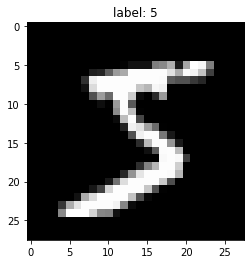

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

KeyboardInterrupt: 

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

print('number of training data: ',len(x_train))
print('number of test data: ',len(x_test))

print('shape of training data: ',x_train.shape)
print('shape of test data: ',x_test.shape)
print('shape of data: ',x_train[0].shape)

image = x_train[0]
label = y_train[0]

plt.imshow(image,cmap = 'gray')
plt.title('label: %s'%label)
plt.show()

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu' ,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

cnn_model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

cnn_model.summary()

x_train_4d = x_train.reshape(-1,28,28,1)
x_test_4d = x_test.reshape(-1,28,28,1)
print('shape of x_train 4d: ',x_train_4d.shape)
print('shape of x_test 4d: ',x_test_4d.shape)

cnn_model.fit(x_train_4d,y_train,epochs=5)

cnn_model.evaluate(x_test_4d,y_test,verbose=1)

eval_data = x_test[500]
eval_data_label = y_test[500]
cnn_model(eval_data.reshape(-1,28,28,1))

print(eval_data_label)